# Practical 2: Quantitative Optical Remote Sensing

In this practical, we will build on the theoretical and Python concepts seen so far to load, plot, and perform quantitative analysis on data from [Landsat 8](https://en.wikipedia.org/wiki/Landsat_8).

## General instructions

Type out your answer to questions in the provided *Markdown* cell (delete the placeholder text). 
You can use the code cells provided to do the calculations.

Remember: 
* Double click on a Markdown cell to edit its contents.
* You can write equations in Markdown by surrounding them in `$`. The syntax for the equations is from a program called [LaTeX](https://en.wikipedia.org/wiki/LaTeX). You can learn about the syntax for writing equations with [this guide](https://www.overleaf.com/learn/latex/Mathematical_expressions).
* To get a cheat sheet of Markdown formatting, click on the menu: Help > Markdown Reference.
* Use descriptive variable names.
* Use the `print` function to display the contents of a variable.
* **Be mindful of units!**

Example equation: $\lambda = \dfrac{c}{\nu} = 10\ \mu m$

## Exercise 1

[![Landsat 8 and 7 bands](https://wiki.landscapetoolbox.org/lib/exe/fetch.php/remote_sensor_types:landsat8_bands.jpg)](https://wiki.landscapetoolbox.org/doku.php/remote_sensor_types:landsat_8)

Analysing the figure above:

1. Why do the sensors in Landsat-7 (ETM+) and Landsat-8 (OLI) avoid the blue spectrum for their panchromatic band?
2. What colour would vegetation appear in a RGB composite of bands 5-4-3 from a Landsat-8 image?

---

**Answer:**

1. Blue light suffers from the strong scattering effects of the atmosphere and usually returns lower energy (lower values of reflectance).
2. Vegetation will appear as bright red because it strongly reflects NIR radiation (band 5).

## Exercise 2

The figure below shows thermal emissivity for various rock types. 
The numbers at the top mark the different [ASTER](https://en.wikipedia.org/wiki/Advanced_Spaceborne_Thermal_Emission_and_Reflection_Radiometer) thermal infrared bands.


![Emissivity profiles for different rock types](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmedia.springernature.com%2Flw785%2Fspringer-static%2Fimage%2Fart%253A10.1007%252Fs13146-011-0071-4%2FMediaObjects%2F13146_2011_71_Fig2_HTML.gif&f=1&nofb=1)

1. Explain why the *carbonate index* (CI) is defined as $\dfrac{band_{13}}{band_{14}}$.
2. What would be a suitable *mafic index* (MI)? Explain your answer.

---

**Answer:**

The CI index is designed to obtain a high value when minerals like calcite and dolomite are present.
There is strong absorption of the two major carbonate-forming minerals around 11.3 μm.
Emissivity is particularly low for band 14, so placing it in the denominator will highlight the contrast with band 13.
Atmospheric anomalies such as clouds or mist can cause relatively high CI values.

A suitable mafic index would be $MI = \dfrac{band_{12}}{band_{13}}$.
It would provide a high value when low silica rocks dominate the emissivity spectrum.
This allow for the identification of basic and ultrabasic rocks, e.g., peridotite.

## Exercise 3

In this exercise, we will work with a subset of a Landsat-8 scene of the [Kīlauea Volcano](https://en.wikipedia.org/wiki/K%C4%ABlauea) on [Hawai'i Island](https://en.wikipedia.org/wiki/Hawaii_(island)) taken on 2018/12/26. This part of the island is known as the Lower East Rift Zone (LERZ) and was the site of the [2018 lower Puna eruptions](https://en.wikipedia.org/wiki/2018_lower_Puna_eruption) (which you might have seen in the news). 

The code below inserts Google Maps in the notebook, which is useful to get a sense for the location. 

In [1]:
from IPython.display import IFrame

IFrame(
    src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d202554.14812323148!2d-155.20944817855005!3d19.380763049328742!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x7953da0aba317e0d%3A0x205a2df987301b9b!2zS8SrbGF1ZWE!5e0!3m2!1sen!2suk!4v1580887731814!5m2!1sen!2suk",
    width="600", height="450", frameborder="0", style="border:0;",
)

The table below shows each Landsat-8 band with their respective names, wavelengths, and resolutions.

<img width="50%" src="https://prd-wret.s3-us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/thumbnails/image/Landsat%208%20band%20designations.jpg">

To save time in the practical, the scene was croped to the area of interest and only bands 1-7 are included (all with 30m resolution). 
The different bands have been stacked and saved in a 3D numpy array with dimensions \[height, width, band\].
The array was saved in the file  `kilauea-landsat8.npy`.
This is not an image file format, it's a binary format used for storing [Numpy](https://numpy.org/) arrays
(only used here to make it easier to load without [specialized libraries](https://rasterio.readthedocs.io)). 
The arrays are enconded in [unsigned 16-bit integers](https://docs.scipy.org/doc/numpy/user/basics.types.html) (`uint16`).

The code below imports the required libraries and loads the stack of scenes from the file.

In [2]:
import numpy as np
import skimage.exposure
import matplotlib.pyplot as plt

In [3]:
scene = np.load("kilauea-landsat8.npy")
print(scene)

[[[8605 8012 7365 ... 7620 7382 6961]
  [8658 8037 7457 ... 7843 7811 7276]
  [8667 8071 7475 ... 7899 7785 7263]
  ...
  [9457 8363 6792 ... 5595 5309 5235]
  [9521 8428 6794 ... 5605 5303 5236]
  [9573 8501 6835 ... 5644 5328 5265]]

 [[8627 8005 7403 ... 7702 7514 7059]
  [8676 8100 7558 ... 8093 8084 7537]
  [8669 8082 7524 ... 8062 8046 7453]
  ...
  [9440 8327 6751 ... 5546 5255 5186]
  [9512 8394 6785 ... 5568 5303 5226]
  [9584 8506 6848 ... 5642 5335 5268]]

 [[8706 8127 7610 ... 8173 7968 7484]
  [8719 8163 7640 ... 8256 8353 7810]
  [8633 8040 7428 ... 7937 7940 7371]
  ...
  [9346 8273 6728 ... 5547 5246 5183]
  [9475 8412 6787 ... 5578 5288 5226]
  [9582 8486 6836 ... 5665 5340 5268]]

 ...

 [[9972 9258 8568 ... 8928 8336 7674]
  [9933 9234 8608 ... 9102 8800 7850]
  [9920 9251 8577 ... 9088 8459 7699]
  ...
  [9772 8606 6903 ... 5705 5394 5315]
  [9726 8573 6872 ... 5677 5394 5302]
  [9754 8599 6912 ... 5704 5383 5297]]

 [[9920 9259 8561 ... 9108 8636 7857]
  [9919 9235

The `shape` of a numpy array is the number of elements per dimensions of the array:

In [4]:
print(scene.shape)

(1100, 2100, 7)


The first two dimensions are the height and the width of the scene. The third is the band. Bands 1-7 are stored in order.

Python supports *unpacking* a collection into different variables like this:

In [5]:
height, width, nbands = scene.shape

You can access parts of a numpy array the way we accessed elements or slices of lists:

In [6]:
# The value of the first pixel on the second band
print(scene[0, 0, 1])
# The first line of the third band
print(scene[0, :, 2])
# The entire fith band
print(scene[:, :, 4])

8012
[7365 7457 7475 ... 6792 6794 6835]
[[7620 7843 7899 ... 5595 5605 5644]
 [7702 8093 8062 ... 5546 5568 5642]
 [8173 8256 7937 ... 5547 5578 5665]
 ...
 [8928 9102 9088 ... 5705 5677 5704]
 [9108 9249 9259 ... 5764 5711 5833]
 [9235 9094 9434 ... 5729 5727 5791]]


Use the cell below to plot the Near Infrared (NIR) band in grey scale:

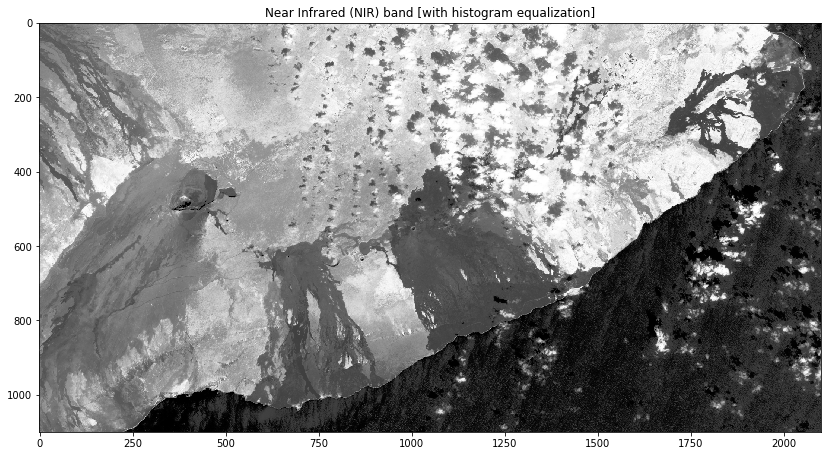

In [7]:
nir = scene[:, :, 4]
nir_scaled = skimage.exposure.equalize_hist(nir)

plt.figure(figsize=(14, 8))
plt.imshow(nir_scaled, cmap="gray")
plt.title("Near Infrared (NIR) band [with histogram equalization]")
plt.show()

To the image in "true color", we have to make a composite of the reg, green, and blue bands:

In [8]:
# Create an empty array of the right size with 3 bands (RGB) using the same data type as the scene
composite = np.empty((height, width, 3), dtype="uint16")
# Assign the red, green, and blue bands to the first, second, and third composite bands, respectively
composite[:,:,0] = scene[:,:,3]
composite[:,:,1] = scene[:,:,2]
composite[:,:,2] = scene[:,:,1]
# Scene values are not in the 0-255 range (8-bit integer) and imshow can't display them properly like that.
# Use scikit-image to rescale the values from 16bit to 8bit.
composite = skimage.exposure.rescale_intensity(composite, out_range="uint8")

Use the cell below to plot the true color composite using `imshow`:

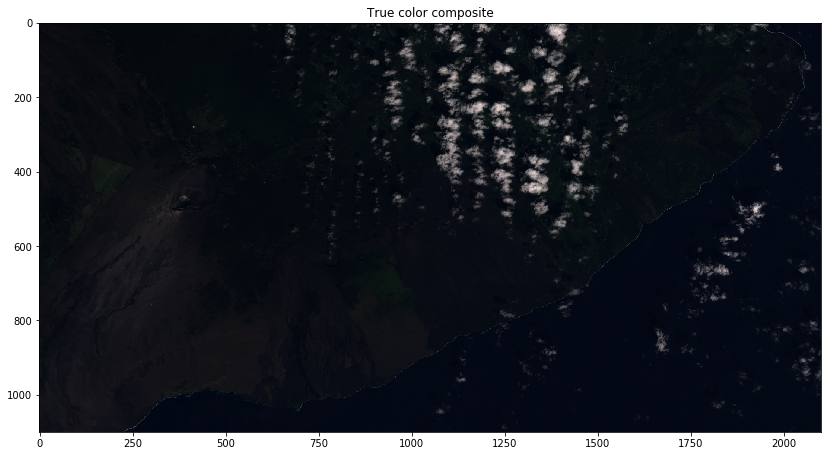

In [9]:
plt.figure(figsize=(14, 8))
plt.imshow(composite)
plt.title("True color composite")
plt.show()

Apply contrast streching (see practical 1) to the composite to increase the visibility of the image:

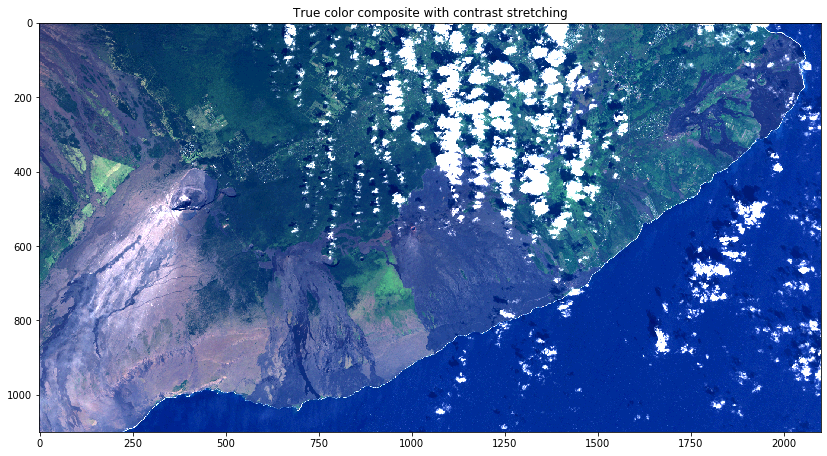

In [10]:
low, high = np.percentile(composite, (5, 95))
composite_scaled = skimage.exposure.rescale_intensity(composite, in_range=(low, high), out_range="uint8")

plt.figure(figsize=(14, 8))
plt.imshow(composite_scaled)
plt.title("True color composite with contrast stretching")
plt.show()

Create and plot a composite of bands 5 (as R), 4 (as G), and 3 (as B). 
You might need to enhance the image.

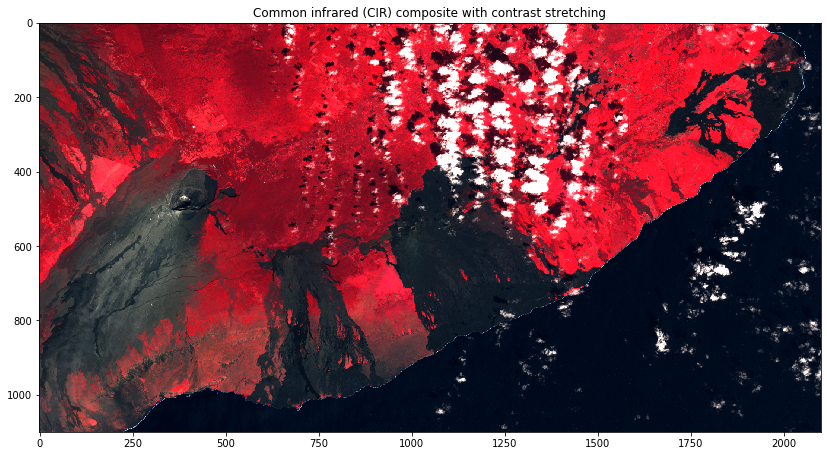

In [11]:
cir_composite = np.empty((height, width, 3), dtype="uint16")
cir_composite[:,:,0] = scene[:,:,4]
cir_composite[:,:,1] = scene[:,:,3]
cir_composite[:,:,2] = scene[:,:,2]
low, high = np.percentile(cir_composite, (5, 95))
cir_composite_rescaled = skimage.exposure.rescale_intensity(cir_composite, in_range=(low, high), out_range="uint8")

plt.figure(figsize=(14, 8))
plt.imshow(cir_composite_rescaled)
plt.title("Common infrared (CIR) composite with contrast stretching")
plt.show()

What is the standard name of this composite? 
Why are these particular bands used and what does the composite highlight?

---

**Answer**:
Common-Infrared (CIR). 
A very common composite, CIR uses the near infrared (shown as red), the red (green), and the green visible band (shown as blue). 
Water absorbs all three wavelengths, so it is black in this composite.
Healthy vegetation appears in bright red since they reflect more near infrared than green and red.

---

The [Normalized Difference Vegetation Index (NDVI)](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) is motivated by the observation that
the difference between the NIR and red bands should be larger for greater chlorophyll density.
The index can be used to quantitavely distinguish between areas with vegetation and areas without.

$NDVI = \dfrac{NIR - red}{NIR + red}$

Calculate and plot a map of the NDVI in gray scale.

**Hint:** Before computing NDVI, we must convert the images from integer numbers to floating-point numbers (the index is a ratio and can't be represented by integer numbers only). To do that to any numpy array, use `new_array = old_array.astype("float32")`.


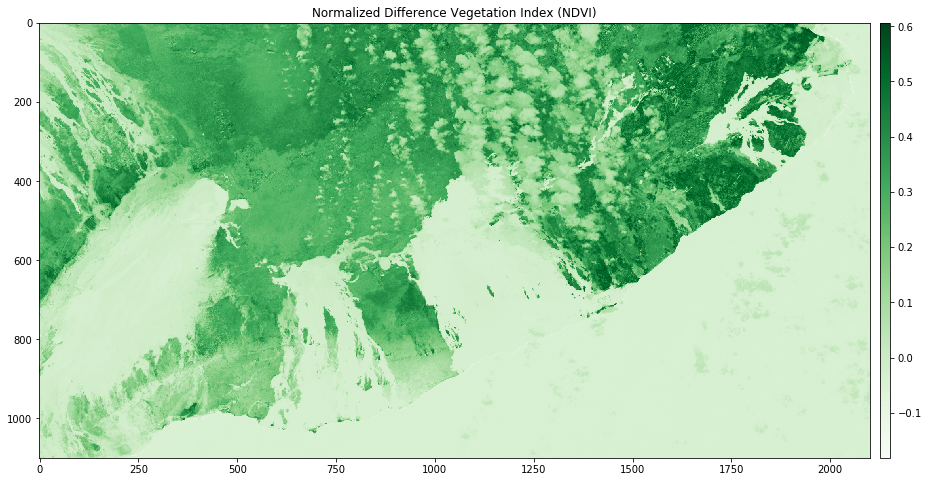

In [12]:
red = scene[:, :, 3].astype("float32")
nir = scene[:, :, 4].astype("float32")
ndvi = (nir - red) / (nir + red)

plt.figure(figsize=(18, 8))
plt.imshow(ndvi, cmap="Greens")
plt.colorbar(pad=0.01, aspect=40)
plt.title("Normalized Difference Vegetation Index (NDVI)")
plt.show()

What do you think the areas with low NDVI represent?

---

**Answer:**
Areas with low NDVI represent relatively recent lava flows which have not been reclaimed by native vegetation. 
The mafic rocks have low relfectivity in the visible and near infrared range, while vegetation presents a clear drop between NIR and red. 
The NDVI highlights this drop, causing lava flows to have small values in this index.

Other areas with NDVI include the ocean water and clouds.

---

# Challenge of the week

Compute the area on this satellite image that might correspond with vegetation. 
Present your results as a percentage of the image. 
To do that, set a threshold for the NDVI (e.g., 0.3) and count the number of pixels that are greater than the threshold.

**Hint:** You can do this using 2 `for` loops and 1 `if` statement. The loops will implement an aggregator pattern.

**Hint 2:** The `range` function generates integer numbers from zero to the specified number (not included). For example, `range(3)` generates the numbers 0, 1, 2. Use it in your `for` loops.

**Bonus:** You can do the same calculation using zero loops and `if` statements, in a single line of code. To do this, you must take full advantage of numpy's capabilities. Try to solve the problem this way as well. 

What are the possible sources of error in this estimate?